In [1]:
from rocketpy import Function, Environment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science', 'no-latex', 'grid'])
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [3]:
ENV = Environment(railLength=5.7,     
                  gravity = 9.8,
                  date=(2019, 8, 10, 21),    
                  latitude = -23.363611, 
                  longitude = -48.011389,
                  elevation=668)



Atmospheric Model Plots


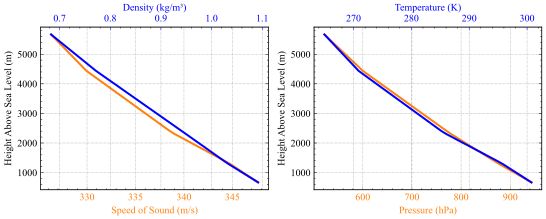



Ensemble Members Comparison


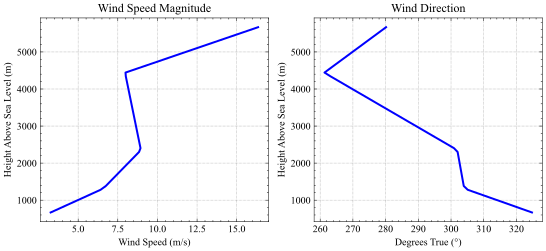

In [19]:
ENV.setAtmosphericModel(type='Ensemble',
                        file='LASC2019_TATUI_reanalysis_ensemble.nc',
                        dictionary="ECMWF")

ENV.maxExpectedHeight = 5000+668

def plotENV(ENV):
    # Plot graphs
    print("\n\nAtmospheric Model Plots")
    # Create height grid
    grid = np.linspace(ENV.elevation, ENV.maxExpectedHeight)

    # Create first figure
    plt.figure(figsize=(9, 3))

    # Create density and speed of sound subplot
    ax2 = plt.subplot(121)
    ax2.plot(
        [ENV.speedOfSound(i) for i in grid],
        grid,
        color='#ff7f0e',
        label="Speed of Sound",
        linewidth=2
    )
    ax2.set_xlabel("Speed of Sound (m/s)", color='#ff7f0e')
    ax2.tick_params("x", colors='#ff7f0e')
    ax2up = ax2.twiny()
    ax2up.plot(
        [ENV.density(i) for i in grid], grid, color='blue', label="Density", linewidth=2
    )
    ax2up.set_xlabel("Density (kg/m³)", color='blue')
    ax2up.tick_params("x", colors='blue')
    ax2.set_ylabel("Height Above Sea Level (m)")
    ax2.grid(True)
    
    # Create pressure and temperature subplot
    ax4 = plt.subplot(122)
    ax4.plot(
        [ENV.pressure(i) / 100 for i in grid], grid, '#ff7f0e', label="Pressure", linewidth=2
    )
    ax4.set_xlabel("Pressure (hPa)", color='#ff7f0e')
    ax4.tick_params("x", colors='#ff7f0e')
    ax4up = ax4.twiny()
    ax4up.plot(
        [ENV.temperature(i) for i in grid],
        grid,
        color='blue',
        label="Temperature",
        linewidth=2
    )
    ax4up.set_xlabel("Temperature (K)", color='blue')
    ax4up.tick_params("x", colors='blue')
    ax4.set_ylabel("Height Above Sea Level (m)")
    ax4.grid(True)
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    #plt.savefig('valetudo_weather_atmospheric_new.pdf')
    plt.show()



    # Plot ensemble member comparison
    if ENV.atmosphericModelType != "Ensemble":
        return None
    print("\n\nEnsemble Members Comparison")
    currentMember = ENV.ensembleMember
    
    # Create figure
    plt.figure(figsize=(9, 12))
    
    # Create wind speed subplot
    ax7 = plt.subplot(323)
    for i in range(1):
        ENV.selectEnsembleMember(i)
        ax7.plot([ENV.windSpeed(i) for i in grid], grid, label=i, linewidth=2, color="blue")
    # ax7.legend(loc='best').set_draggable(True)
    ax7.set_ylabel("Height Above Sea Level (m)")
    ax7.set_xlabel("Wind Speed (m/s)")
    ax7.set_title("Wind Speed Magnitude")
    ax7.grid(True)

    # Create wind direction subplot
    ax8 = plt.subplot(324)
    for i in range(1):
        ENV.selectEnsembleMember(i)
        ax8.plot([ENV.windDirection(i) for i in grid], grid, label=i, linewidth=2, color="blue")
    # ax8.legend(loc='best').set_draggable(True)
    ax8.set_ylabel("Height Above Sea Level (m)")
    ax8.set_xlabel("Degrees True (°)")
    ax8.set_title("Wind Direction")
    ax8.grid(True)
    
    # Display plot
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    #plt.savefig('valetudo_weather_ensemble_new.pdf')
    plt.show()

plotENV(ENV)